### Initial EDA

##### This is the notebook for our exploratory data analysis, we will produce various visualizations to draw trends from the data

In [43]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Customary to import NumPy as np
# Import numpy to generate some dummy data if necessary
import numpy as np 
# Import Pandas under the alias pd
import pandas as pd
# Import seaborn and set the standard alias of sns
import seaborn as sns
# Set so that our visualizations appear in the notebook and note as seprate files
%matplotlib inline

In [44]:
# Import the data into a Pandas DataFrame
df = pd.read_csv('../data/BankChurners.csv')

In [45]:
#Returns the number of columns in a DataFrame
len((df.columns))

23

In [46]:
#Displays first 5 rows of the DataFrame 
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [47]:
#Drops last two columns of the DataFrame 
#Removes column CLIENTNUM
df = df.drop(df.columns[-2:], axis=1)
df = df.drop(["CLIENTNUM"], axis=1)

In [48]:
#Returns the number of columns in a DataFrame
len(df.columns)

20

In [49]:
#Counts the occurance of each unique value in attrition_flag column
df["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [50]:
# Existing Customer will be 1 and Attrited Customer will be 0 - Check this on friday meeting

df["Attrition_Flag"] = df["Attrition_Flag"].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [51]:
#Counts the occurance of each unique value in attrition_flag column
df["Attrition_Flag"].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [52]:
#Y  is target variable, everything else is X
y = df["Attrition_Flag"]
X = df.drop(["Attrition_Flag"], axis=1)

In [53]:
#Returns description of data in DataFrame
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [54]:
#Prints a summary of DataFrame
#Includes dtype, columns dtypes, non-null values
#Includes the total number of entries and each attribute's type and number of non-null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [55]:
#Counts the occurance of each unique value in Gender column
df["Gender"].value_counts(normalize=True)

Gender
F    0.529081
M    0.470919
Name: proportion, dtype: float64

In [56]:
#Counts the occurance of each unique value in Education_Level column
df["Education_Level"].value_counts(normalize=True)

Education_Level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64

In [57]:
#Counts the occurance of each unique value in Marital_Status column
df["Marital_Status"].value_counts(normalize=True)

Marital_Status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: proportion, dtype: float64

In [58]:
#Counts the occurance of each unique value in Income_Category column
df["Income_Category"].value_counts(normalize=True)

Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: proportion, dtype: float64

In [59]:
#Counts the occurance of each unique value in Card_Category column
df["Card_Category"].value_counts(normalize=True)

Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: proportion, dtype: float64

In [60]:
#Counts occurance of each unqiue value in variable Y
y.value_counts() # Note: imbalance within the target data, will need to be handled

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

(array([1627.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

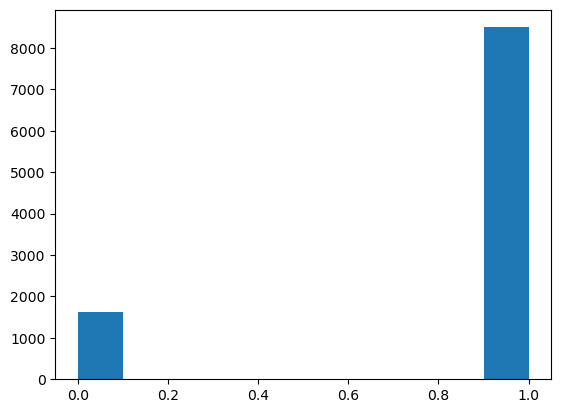

In [61]:
#Creates histogram of the values in the variable Y
plt.hist(y)

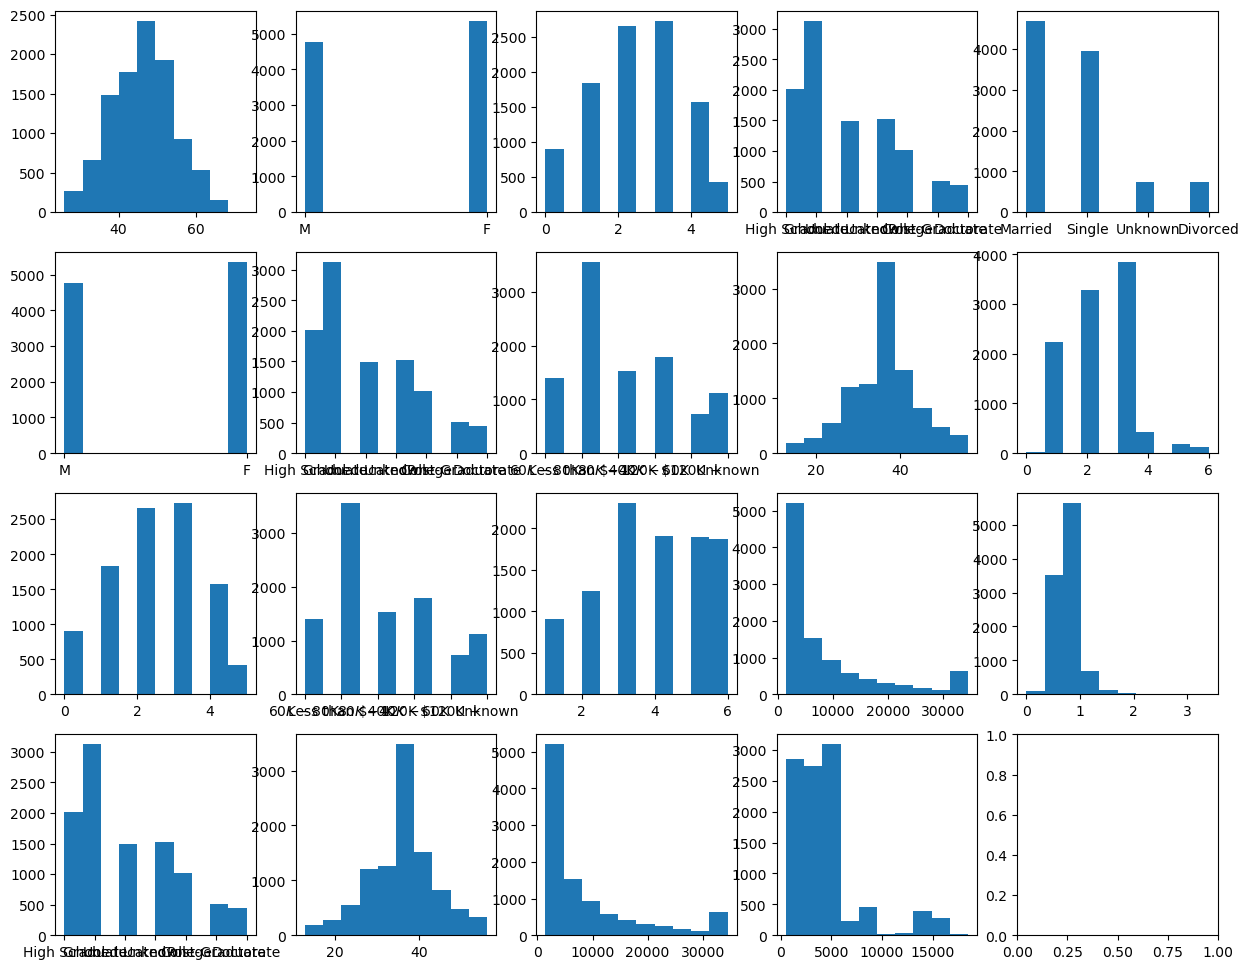

In [62]:
# Create a subplot grid of 4 rows and 5 columns, with a specified figure size of 15x12
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15,12))

# Loop through the number of columns (from 1 to 5)
for i in range(1,6):
    # Loop through the number of rows (from 1 to 4)
    for j in range(1,5):
        # If we reach the last subplot in the grid (5th column, 4th row), break the loop
        if i == 5 and j == 4:
            break
        # For each subplot, plot a histogram of the data from the corresponding column in X dataframe
        # The column index for the data is calculated as (i*j)-1
        ax[j-1][i-1].hist(X[X.columns[(i*j) - 1]])

Create Visualizations for each feature and look at only the data points in which a customer leaves and see what values each feature holds when that is true

C:\Users\ajarcik\AppData\Local\Temp\ipykernel_25144\2608040628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrited_cust.drop(["Attrition_Flag"], inplace=True,axis=1)


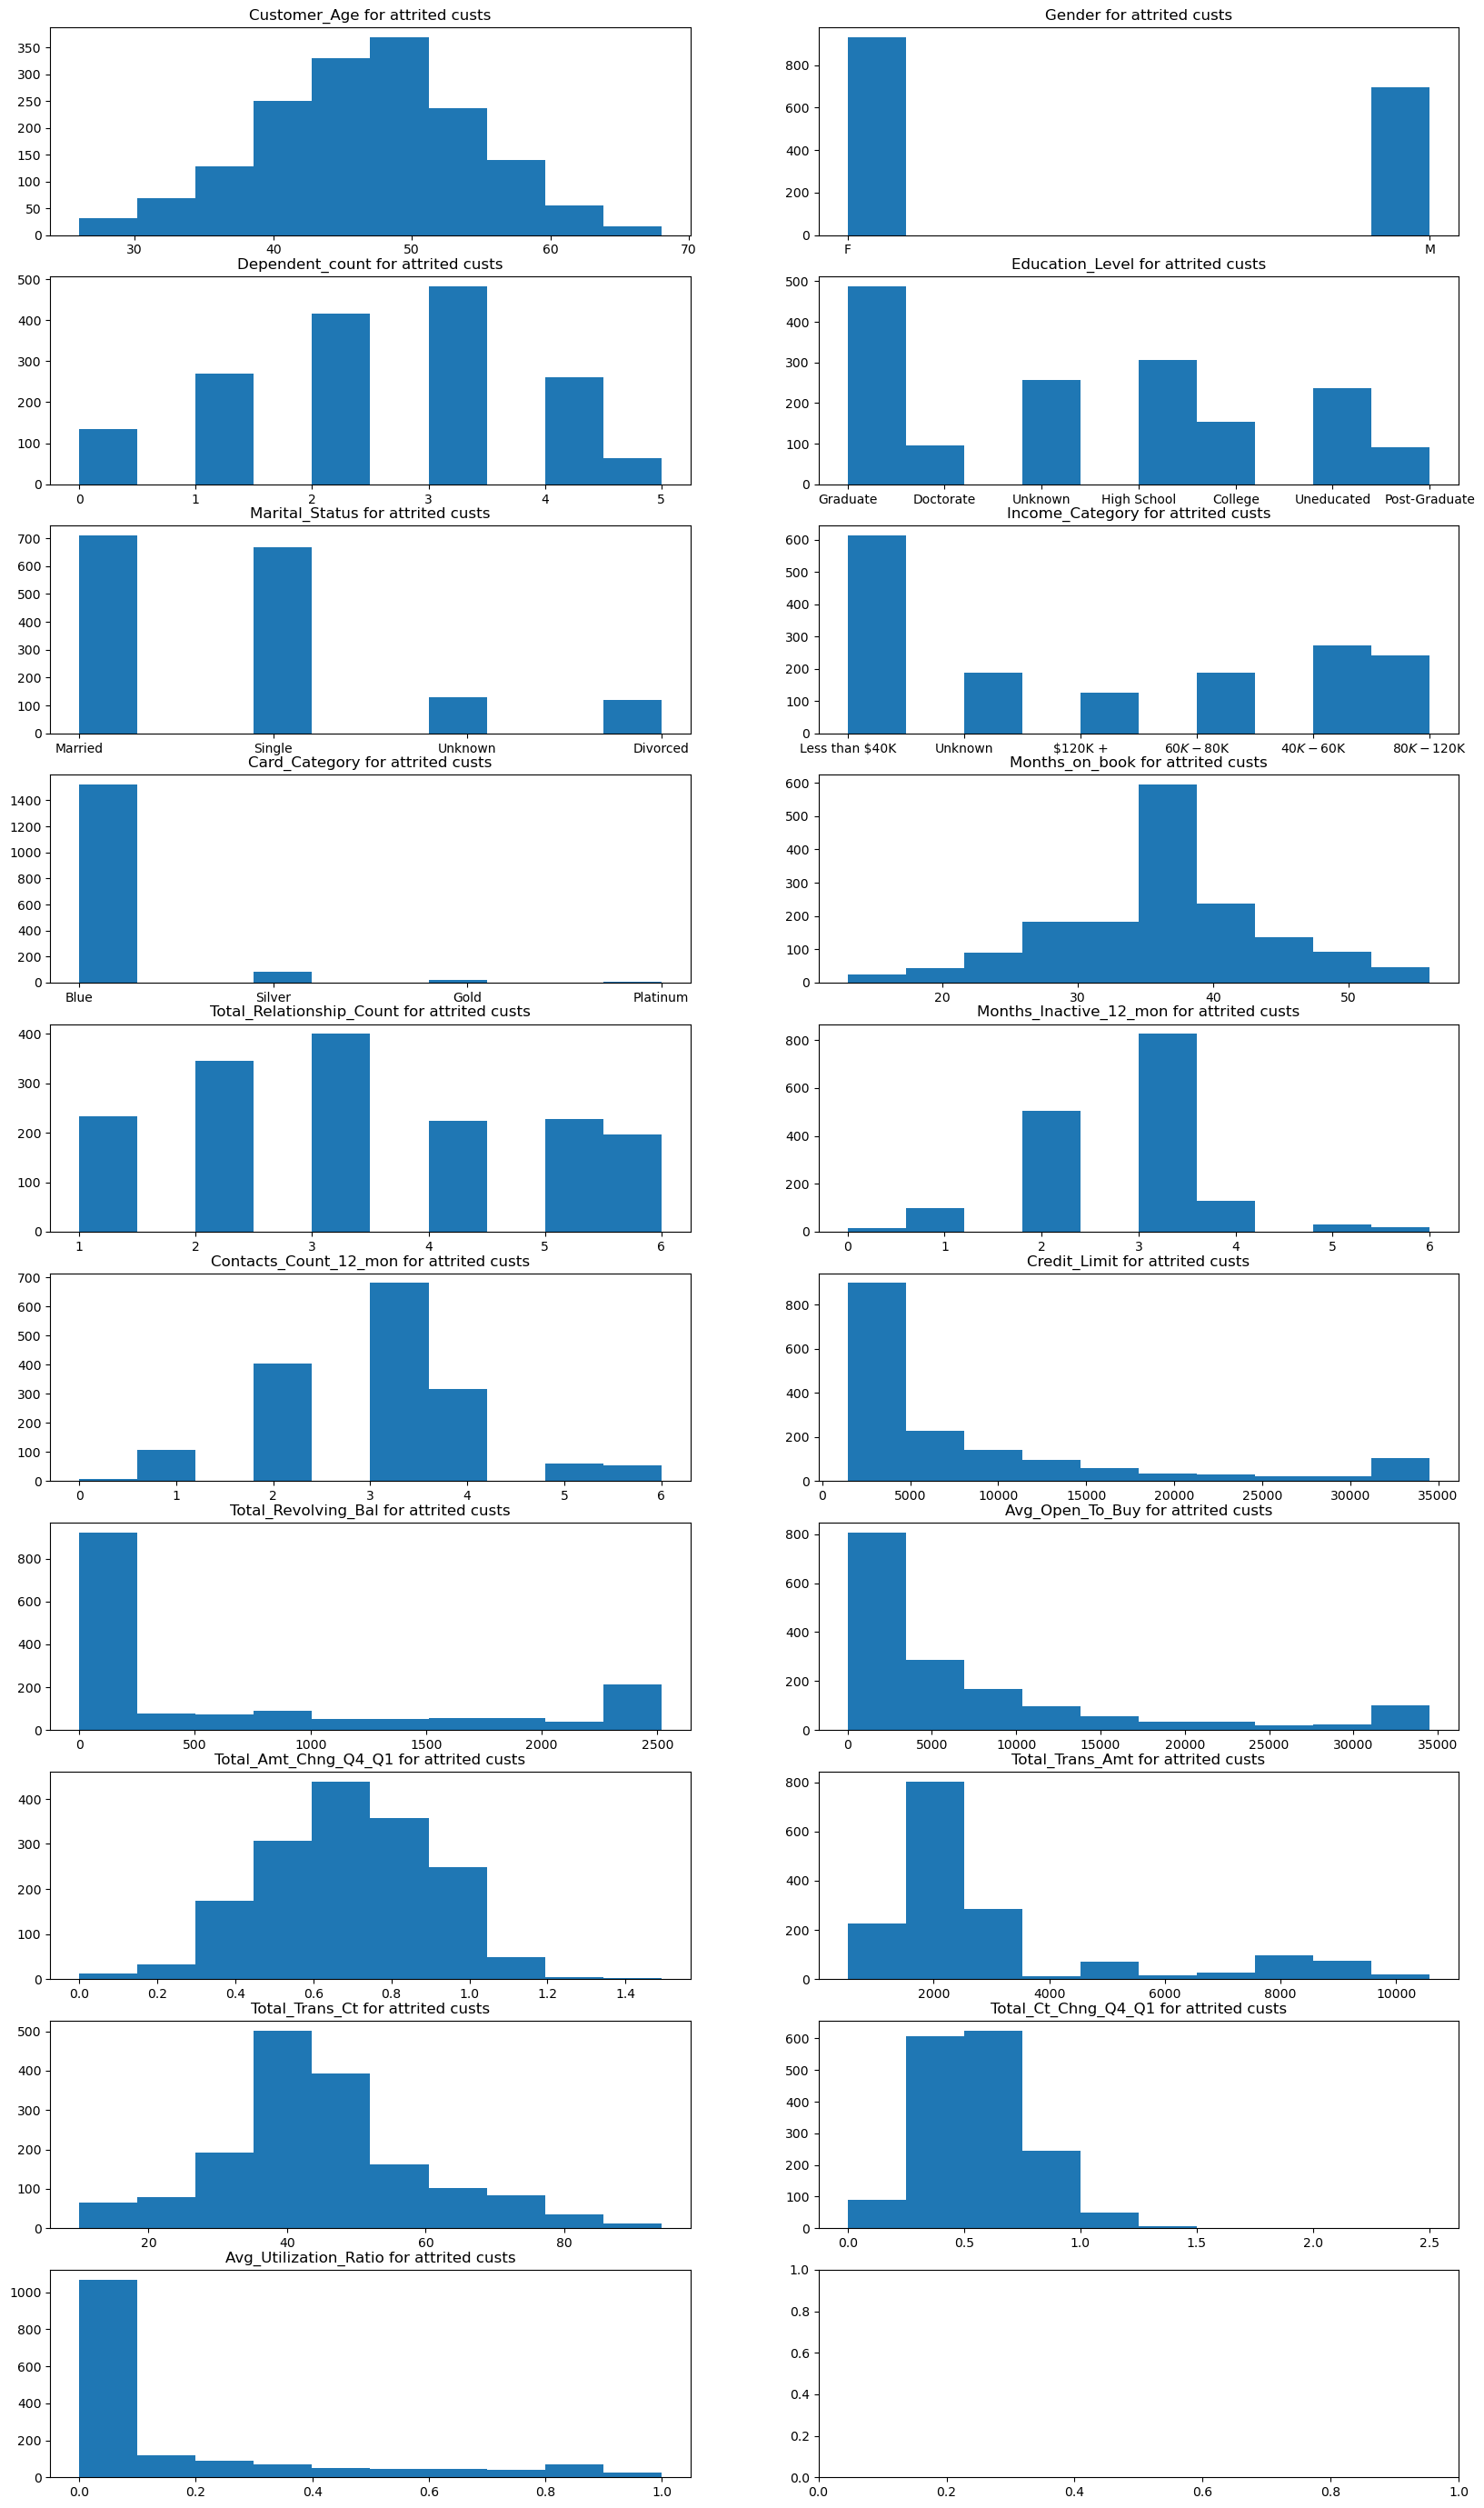

In [161]:
# Create a subplot grid of 4 rows and 5 columns, with a specified figure size of 15x12
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(20,35))

attrited_cust = df.loc[df["Attrition_Flag"] == 0]
attrited_cust.drop(["Attrition_Flag"], inplace=True,axis=1)

# For each subplot, plot a histogram of the data from the corresponding column in X dataframe
# The column index for the data is calculated as (i*j)-1
i = 0
j = 0
for col in attrited_cust.columns:
    ax[j][i].hist(attrited_cust[col])
    ax[j][i].set_title(f"{col} for attrited custs")
    if i == 1:
        i = 0
        j += 1
    else:
        i += 1

### Next Step: Feature Selection

### Model Selection:

Supervised:
Baseline - Logistic Regression
Naive Bayes
Decision Tree / Random Forest (hard to interpret)

Unsupervised:
SVM (if time permits)
KNN

In [63]:
#Importing all necessary libraries for use
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #OneHotEncoder from scikit-learn (documentation here) can be used to convert categorical variables into dummy one-hot encoded variables:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

In [64]:
#Split dataset into training and testing sets. X is the feature set, y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
#Displays the data type of each column in the DataFrame 
X.dtypes 

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [66]:
# Define a list of column names that represent categorical features in the dataset
categorical_features = ['Gender','Education_Level', 'Marital_Status','Income_Category','Card_Category']
# Create a new DataFrame 'X_train_categorical' that includes only the categorical columns from the training data
X_train_categorical = X_train[categorical_features].copy()
# Display the 'X_train_categorical' DataFrame
X_train_categorical

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
6780,F,Uneducated,Single,$40K - $60K,Blue
4555,M,Unknown,Married,$120K +,Blue
811,M,Unknown,Divorced,$60K - $80K,Blue
1940,M,Graduate,Divorced,$40K - $60K,Blue
6658,F,High School,Single,Less than $40K,Blue
...,...,...,...,...,...
9225,M,Unknown,Single,$60K - $80K,Blue
4859,M,Uneducated,Single,$60K - $80K,Blue
3264,M,Unknown,Single,$60K - $80K,Blue
9845,M,College,Married,$120K +,Blue


In [67]:
# Initialize a OneHotEncoder from sklearn's preprocessing module
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
# Fit the one hot encoder model
ohe.fit(X_train_categorical)
# Transform the categorical columns in the training data into one-hot encoded columns
X_train_ohe = pd.DataFrame(
     # Transform the categorical data into one-hot encoded format
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    # Create column names for the one-hot encoded columns by stacking the categories from each original column
    columns=np.hstack(ohe.categories_)
)
# Display the newly created DataFrame 'X_train_ohe'
X_train_ohe.drop(["Unknown"], axis=1, inplace=True) # Drops all of the Unknown categories as these will serve as our base case for that individual encoded category

# Display the newly created DataFrame 'X_train_ohe'


c:\Users\ajarcik\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [68]:
#Displays the column names of the DataFrame
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [69]:
#Define a list of column names that represent numeric features in the dataset
numeric_features = ['Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
# Create a new DataFrame 'X_train_numeric' that includes only the numeric columns from the training data
X_train_numeric = X_train[numeric_features].copy()
# Display the 'X_train_numeric' DataFrame
X_train_numeric

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6780,47,3,35,6,5,2,4543.0,1028,3515.0,0.799,4093,77,0.571,0.226
4555,43,4,37,3,1,3,20695.0,1250,19445.0,0.605,3924,82,0.783,0.060
811,43,3,30,3,2,1,2588.0,1669,919.0,0.788,1053,31,0.550,0.645
1940,36,3,28,4,2,3,8995.0,1547,7448.0,0.923,2398,61,0.794,0.172
6658,39,1,31,5,2,1,1862.0,726,1136.0,0.630,5105,79,1.026,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,30,0,20,1,3,3,23760.0,1349,22411.0,0.961,13124,103,0.746,0.057
4859,50,2,43,4,3,3,4388.0,642,3746.0,0.815,3836,81,0.723,0.146
3264,60,1,50,4,3,0,10698.0,1790,8908.0,0.981,4095,67,0.914,0.167
9845,51,3,40,3,3,2,34516.0,1476,33040.0,0.763,14145,119,0.776,0.043


In [70]:
## Create a new DataFrame 'X_train_numeric' that includes only the numeric columns from the training data
X_train_numeric = X_train[numeric_features].copy()
## Display the 'X_train_numeric' DataFrame
X_train_numeric

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6780,47,3,35,6,5,2,4543.0,1028,3515.0,0.799,4093,77,0.571,0.226
4555,43,4,37,3,1,3,20695.0,1250,19445.0,0.605,3924,82,0.783,0.060
811,43,3,30,3,2,1,2588.0,1669,919.0,0.788,1053,31,0.550,0.645
1940,36,3,28,4,2,3,8995.0,1547,7448.0,0.923,2398,61,0.794,0.172
6658,39,1,31,5,2,1,1862.0,726,1136.0,0.630,5105,79,1.026,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,30,0,20,1,3,3,23760.0,1349,22411.0,0.961,13124,103,0.746,0.057
4859,50,2,43,4,3,3,4388.0,642,3746.0,0.815,3836,81,0.723,0.146
3264,60,1,50,4,3,0,10698.0,1790,8908.0,0.981,4095,67,0.914,0.167
9845,51,3,40,3,3,2,34516.0,1476,33040.0,0.763,14145,119,0.776,0.043


In [71]:
#Display the data types of each column in the X_train_numeric DataFrame
X_train_numeric.dtypes

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [72]:
# Import MinMaxScaler from the sklearn.preprocessing
from sklearn.preprocessing import StandardScaler # MinMax
# Instantiate the MinMaxScaler
scaler = StandardScaler()
# Fit the MinMaxScaler to the numeric columns in the training data
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6780,0.073104,0.503516,-0.124793,1.411757,2.614490,-0.408356,-0.454138,-0.160888,-0.439756,0.178225,-0.086861,0.523369,-0.588585,-0.166503
4555,-0.426760,1.274058,0.126314,-0.518913,-1.320522,0.488539,1.322717,0.110302,1.313105,-0.702404,-0.136550,0.736454,0.289234,-0.770075
811,-0.426760,0.503516,-0.752561,-0.518913,-0.336769,-1.305251,-0.669204,0.622144,-0.725408,0.128292,-0.980666,-1.437019,-0.675539,1.356971
1940,-1.301523,0.503516,-1.003668,0.124644,-0.336769,0.488539,0.035620,0.473111,-0.006988,0.741101,-0.585216,-0.158505,0.334782,-0.362846
6658,-0.926625,-1.037569,-0.627007,0.768201,-0.336769,-1.305251,-0.749070,-0.529804,-0.701530,-0.588921,0.210682,0.608603,1.295414,0.429797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,-2.051319,-1.808111,-2.008096,-1.806026,0.646984,0.488539,1.659893,0.231239,1.639469,0.913595,2.568385,1.631414,0.136030,-0.780983
4859,0.448002,-0.267027,0.879635,0.124644,0.646984,0.488539,-0.471189,-0.632417,-0.414338,0.250854,-0.162423,0.693837,0.040795,-0.457381
3264,1.697663,-1.037569,1.758509,0.124644,0.646984,-2.202146,0.222964,0.769955,0.153664,1.004382,-0.086273,0.097197,0.831660,-0.381025
9845,0.572968,0.503516,0.502974,-0.518913,0.646984,-0.408356,2.843143,0.386379,2.809034,0.014809,2.868574,2.313288,0.260250,-0.831887


In [73]:
# Concatenate the scaled numeric DataFrame 'X_train_scaled' and the one-hot encoded DataFrame 'X_train_ohe'
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
# Display the newly created DataFrame 'X_train_full'
X_train_full

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
6780,0.073104,0.503516,-0.124793,1.411757,2.614490,-0.408356,-0.454138,-0.160888,-0.439756,0.178225,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4555,-0.426760,1.274058,0.126314,-0.518913,-1.320522,0.488539,1.322717,0.110302,1.313105,-0.702404,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
811,-0.426760,0.503516,-0.752561,-0.518913,-0.336769,-1.305251,-0.669204,0.622144,-0.725408,0.128292,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1940,-1.301523,0.503516,-1.003668,0.124644,-0.336769,0.488539,0.035620,0.473111,-0.006988,0.741101,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6658,-0.926625,-1.037569,-0.627007,0.768201,-0.336769,-1.305251,-0.749070,-0.529804,-0.701530,-0.588921,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,-2.051319,-1.808111,-2.008096,-1.806026,0.646984,0.488539,1.659893,0.231239,1.639469,0.913595,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4859,0.448002,-0.267027,0.879635,0.124644,0.646984,0.488539,-0.471189,-0.632417,-0.414338,0.250854,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3264,1.697663,-1.037569,1.758509,0.124644,0.646984,-2.202146,0.222964,0.769955,0.153664,1.004382,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9845,0.572968,0.503516,0.502974,-0.518913,0.646984,-0.408356,2.843143,0.386379,2.809034,0.014809,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Feature Selection

In [74]:
from sklearn.decomposition import PCA

# Instantiating the pca object
pca = PCA(n_components=5)

# fit transform the pca on the data
X_train_pca = pca.fit_transform(X_train_full)

In [75]:
pca.explained_variance_ratio_ # Suggests that we need more data due tolow explanation of variance


array([0.16452522, 0.1257345 , 0.10821636, 0.08948535, 0.07599363])

In [84]:
pca.feature_names_in_

array(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'F', 'M', 'College', 'Doctorate', 'Graduate', 'High School',
       'Post-Graduate', 'Uneducated', 'Divorced', 'Married', 'Single',
       '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Blue', 'Gold', 'Platinum', 'Silver'],
      dtype=object)

### SMOTE

In [76]:
# We run this code due to the imbalance of the classes within our data
oversample = SMOTE(random_state=42) # Instantiating SMOTE object for oversampling with random state 42
X_train_final, y_train_final = oversample.fit_resample(X_train_pca, y_train) # Resample the data in order to make the class counts balanced

In [77]:
y_train_final.value_counts()

Attrition_Flag
1    6352
0    6352
Name: count, dtype: int64

In [87]:
# Handling categorical data
X_test_categorical = X_test[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

X_test_ohe.drop(["Unknown"], axis=1, inplace=True) # Drops all of the Unknown categories as these will serve as our base case for that individual encoded category

# Normalization
X_test_numeric = X_test[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_pca = pca.transform(X_test_full)
X_test_pca

array([[ 1.2221741 ,  0.0883102 , -0.28793468,  1.31239828, -0.01570907],
       [ 3.19814836,  0.00364648, -0.33479044, -0.52481265,  0.63476788],
       [-1.67475596,  1.97316788, -1.1535433 ,  0.12046071, -1.4572006 ],
       ...,
       [-0.23953594,  0.12327472, -1.27544247, -0.97616411,  1.61488974],
       [ 0.52045135,  1.5007488 ,  1.30804849, -0.2602143 , -1.02967971],
       [-0.1150768 , -0.91521467, -0.27150842, -0.85612967,  1.22695865]])

### Logistic Regression

In [88]:
# Import the LogisticRegression model from the sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# Instantiate the LogisticRegression model with specific parameters:
# fit_intercept=False to indicate that no intercept should be used in the calculations
# C=1e12 to set the inverse of regularization strength to a very large number, effectively disabling regularization
# solver='liblinear' to specify the algorithm used for optimization (good for small datasets)
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_final, y_train_final)
# Display the fitted model
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [89]:
# Use the trained Logistic Regression model to make predictions on the training data
y_hat_train = logreg.predict(X_train_final)

In [90]:
# Calculate the residuals (differences between actual and predicted values) for the training data
# 'np.abs()' is used to get the absolute values of the residuals
train_residuals = np.abs(y_train_final - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
# Print the proportion of each unique residual value
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    9013
1    3691
Name: count, dtype: int64

Residuals (proportions)
0    0.709462
1    0.290538
Name: proportion, dtype: float64


In [92]:
# Use the trained Logistic Regression model to make predictions on the test data
y_hat_test = logreg.predict(X_test_pca)
# Calculate the residuals (differences between actual and predicted values) for the test data
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
# Print the proportion of each unique residual value in the test data
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    1591
1     941
Name: count, dtype: int64

Residuals (proportions)
0    0.628357
1    0.371643
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

# Calculate accuracy 
acc = accuracy_score(y_test, y_hat_test)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_hat_test)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_hat_test)

Accuracy is :0.5485781990521327
Precision is :0.8838808250572956

AUC is :0.57

Confusion Matrix
----------------


array([[ 232,  152],
       [ 991, 1157]], dtype=int64)

### Decision Trees

The target value 1 means that a customer stays, 0 means they leave.
A false positive is a case where y_pred = 1 but y_act = 0: meaning we predict them to stay, but they churn out in reality.
So, false positive is our crucial metric
Thus, precision is our crecual statistic because precision increases as the false positive rate decrease.

In [93]:
from sklearn.tree import DecisionTreeClassifier # Import the Decision Tree

# Instantiate the classifier object with a random state of 42
model = DecisionTreeClassifier(random_state=42)
# Fit the classifier
model.fit(X_train_final, y_train_final)

DecisionTreeClassifier(random_state=42)

In [94]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8214849921011058
Precision is :0.9278506559031282

AUC is :0.74

Confusion Matrix
----------------


array([[ 241,  143],
       [ 309, 1839]], dtype=int64)

In [95]:
y_test.value_counts()

Attrition_Flag
1    2148
0     384
Name: count, dtype: int64

This means the Decision Tree predicts 2022/2148 non churners and it predicts 323/384 churners

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier object with a random state of 42
model = RandomForestClassifier(max_depth=3, random_state=42)
# Fit the classifier
model.fit(X_train_final, y_train_final)

RandomForestClassifier(max_depth=3, random_state=42)

In [97]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8270142180094787
Precision is :0.9362244897959183

AUC is :0.76

Confusion Matrix
----------------


array([[ 259,  125],
       [ 313, 1835]], dtype=int64)

### KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifier object with n-neighbors as 5
model = KNeighborsClassifier(n_neighbors=5)
# Fit the classifier
model.fit(X_train_final, y_train_final)

KNeighborsClassifier()

In [99]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8199052132701422
Precision is :0.9457323498419389

AUC is :0.78

Confusion Matrix
----------------


array([[ 281,  103],
       [ 353, 1795]], dtype=int64)

In [ ]:
y_test.value_counts()

Attrition_Flag
1    2148
0     384
Name: count, dtype: int64

This means the KNN classifier predicted 1574/2148 True Positives and 246/384 True Negatives.

### K Means

In [100]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=42, n_init="auto")

# Fit the classifier
model.fit(X_train_final, y_train_final)

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [101]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.405608214849921
Precision is :0.7676935886761033

AUC is :0.35

Confusion Matrix
----------------


array([[ 105,  279],
       [1226,  922]], dtype=int64)

### Hyper Parameter Optimization using GridCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import the Decision Tree

# Instantiate the classifier object with a random state of 42
model = DecisionTreeClassifier(random_state=42)
# Fit the classifier
model.fit(X_train_final, y_train_final)

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

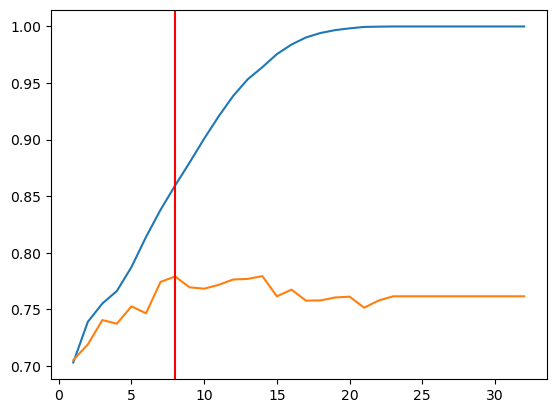

In [103]:
depth_list = np.linspace(1,32,32)
total_roc_auc_train = []
total_roc_auc_test = []
for depth in depth_list:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=int(depth), random_state=42)
    dt.fit(X_train_final, y_train_final)
    y_train_pred = dt.predict(X_train_final)
    y_test_pred = dt.predict(X_test_pca)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train_final, y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
    roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
    roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
    total_roc_auc_train.append(roc_auc_train)
    total_roc_auc_test.append(roc_auc_test)
plt.plot(depth_list, total_roc_auc_train)
plt.plot(depth_list, total_roc_auc_test)
plt.axvline(x=8, color='r');

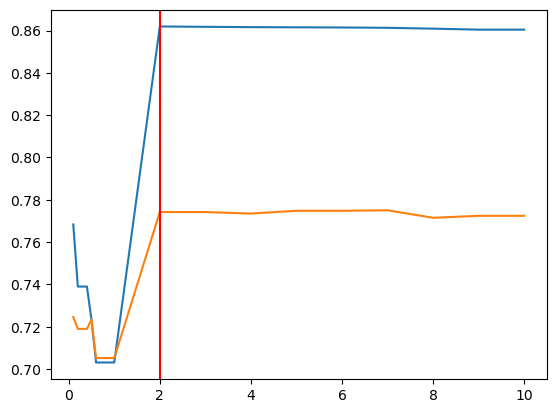

In [136]:
# Identify the optimal min-samples-split for given data
split_list = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,2,3,4,5,6,7,8,9,10]
total_roc_auc_train = []
total_roc_auc_test = []
for sp in split_list:
    dt = DecisionTreeClassifier(max_depth=8, min_samples_split=sp, random_state=42)
    dt.fit(X_train_final, y_train_final)
    y_train_pred = dt.predict(X_train_final)
    y_test_pred = dt.predict(X_test_pca)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train_final, y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
    roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
    roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
    total_roc_auc_train.append(roc_auc_train)
    total_roc_auc_test.append(roc_auc_test)
plt.plot(split_list, total_roc_auc_train)
plt.plot(split_list, total_roc_auc_test)
plt.axvline(x=2, color='r');

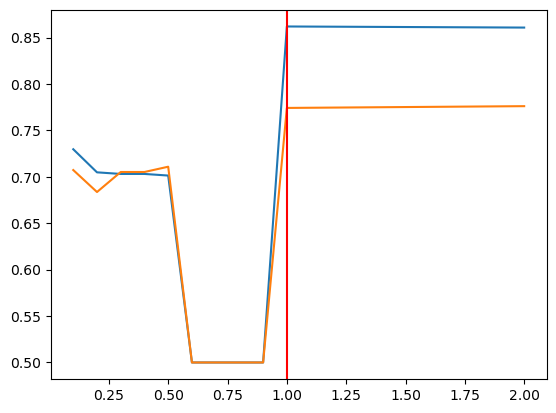

In [139]:
# Calculate the optimal value for minimum sample leafs
leaf_list = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1,2]
total_roc_auc_train = []
total_roc_auc_test = []
for sp in leaf_list:
    dt = DecisionTreeClassifier(max_depth=8, min_samples_split=2, min_samples_leaf=sp, random_state=42)
    dt.fit(X_train_final, y_train_final)
    y_train_pred = dt.predict(X_train_final)
    y_test_pred = dt.predict(X_test_pca)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train_final, y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
    roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
    roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
    total_roc_auc_train.append(roc_auc_train)
    total_roc_auc_test.append(roc_auc_test)
plt.plot(leaf_list, total_roc_auc_train)
plt.plot(leaf_list, total_roc_auc_test)
plt.axvline(x=1, color='r');

In [140]:
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt.fit(X_train_final, y_train_final)

from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = dt.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8309636650868878
Precision is :0.9396728016359919

AUC is :0.77

Confusion Matrix
----------------


array([[ 266,  118],
       [ 310, 1838]], dtype=int64)